In [71]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
from xml.etree import ElementTree
from xml.dom import minidom


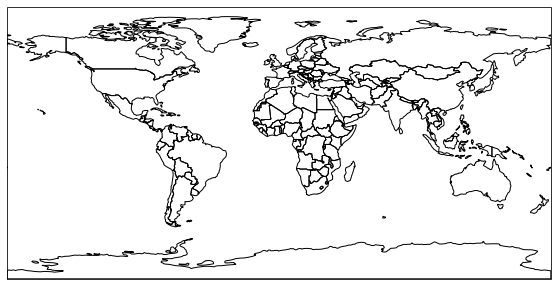

In [72]:

# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add borders to the plot
shape_file = shpreader.natural_earth(resolution='110m',
                                     category='cultural',
                                     name='admin_0_countries')
for shape in shpreader.Reader(shape_file).records():
    ax.add_geometries([shape.geometry], ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none')

# ax.set_frame_on(False)


In [73]:
# Save the plot as an SVG file
plt.savefig('borders_temp.svg', format='svg', dpi=300)
# , bbox_inches="tight"


<Figure size 432x288 with 0 Axes>

In [74]:
tree = ElementTree.parse('borders_temp.svg')
root = tree.getroot()

# Find the first "g" element and add the shapes as children
g = root.find('.//{http://www.w3.org/2000/svg}g')
for shape in shpreader.Reader(shape_file).records():
    path = ElementTree.Element('path')
    path.set('d', shape.geometry.svg(scale_factor=1))
    path.set('stroke', 'black')
    path.set('fill', 'none')
    g.append(path)

# Write the updated SVG file to disk
tree.write('borders.svg')